# Investigating algorithms that can be used to compute Convex Hull


#### Import statements

In [58]:
import math
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Graham Scan algorithm

In [59]:
def polarAngle(p0, p1 = None):
    if p1 == None:
        p1 = llmPoint
    dy = p0[1] - p1[1]
    dx = p0[0] - p1[0]
    return math.atan2(dy, dx)


def distance(p0, p1 = None):
    if p1 == None:
        p1 = llmPoint
    dy = p0[1] - p1[1]
    dx = p0[0] - p1[0]
    return dy ** 2 + dx ** 2


def determinant(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def swap(arr, i, j):       
    arr[i], arr[j] = arr[j], arr[i] 
    return arr

def partition(arr,l,h):
    i = l - 1
    x = arr[h]
    for j in range(l,h):
        if polarAngle(arr[j]) <= polarAngle(x):
            i += 1
            arr = swap(arr,i,j)
    arr = swap(arr,i+1,h)
    return i + 1

def quickSort(arr,l,h):
    sortedPoints = []
    sortedPoints.append(l)
    sortedPoints.append(h)
 
    while len(sortedPoints) > 0:
 
        h = sortedPoints.pop()
        l = sortedPoints.pop()
        p = partition(arr,l,h)
         
        if p-1 > l:
            sortedPoints.append(l)
            sortedPoints.append(p-1)
            
        if p+1 < h:
            sortedPoints.append(p+1)
            sortedPoints.append(h)

def LowestLeftMost(inputSet):
    MIN = 0
    for i in range(0, len(inputSet)):
        if inputSet[i][1] < inputSet[MIN][1]:
            MIN = i
        if inputSet[i][1] == inputSet[MIN][1]:
            if inputSet[i][0] < inputSet[MIN][0]:
                MIN = i     
    return inputSet[MIN]

def grahamscan(inputSet):
    global llmPoint
    llmPoint = LowestLeftMost(inputSet)
    quickSort(inputSet,0,len(inputSet)-1)
    sortedPoints = inputSet

    outputSet = [llmPoint, sortedPoints[0]]
    for s in sortedPoints[1:]:
        while determinant(outputSet[-2], outputSet[-1], s) <= 0:
            outputSet.pop()
            if len(outputSet) < 2: 
                break
        outputSet.append(s)
    return outputSet

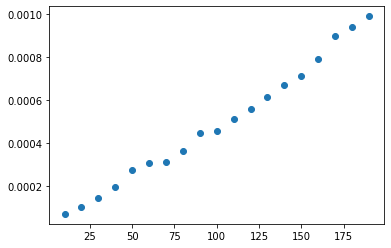

In [120]:
n = [x for x in range(10,200, 10)]
times = []
for points in n:
    total_time = 0
    for i in range(0, 20):
        start = time.time()
        grahamscan(np.random.random(size=(points,2)).tolist())
        total_time += time.time() - start
    times.append(total_time / 20)

plt.scatter(n, times)
plt.show()

# Jarvis March algorithm

In [4]:
def direction(p,q,r):
    #finds the 2D determinant between three points
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    #all points lie on a straight line
    if val == 0:
        return 0
    elif val > 0:
        return 1
    else:
        return -1

def getLeftIndex(points):
    MIN = 0
    for i in range(1, len(points)):
        #finds the point with the lowest x coordinate
        if points[i][0] < points[MIN][0]:
            MIN = i
    return MIN


def jarvismarch(inputSet):
    n = len(inputSet)
    #A convex hull must have at least three points
    if n < 3:
        return
    
    outputSet = []
    l = getLeftIndex(inputSet)
    #p holds current point index
    p = l
    #q holds the most anticlockwise point made with the current point
    q = 0 
    while True:
        outputSet.append(inputSet[p])
        #by default the most anitclockwise point will be the next point after the current point
        q = (p + 1) % n 
        
        for i in range(0,n):
            if direction(inputSet[p],inputSet[i],inputSet[q]) == -1:
                # when a more anticlockwise point has been found
                # the most anticlokwise point must be updated
                q = i
        #once all comparisons have been made for the current point
        #the anticlockwise point is now the current point
        p = q
        #once the current point loops back to the left most point then it exits the loop
        if p == l:
            break
    
    return outputSet

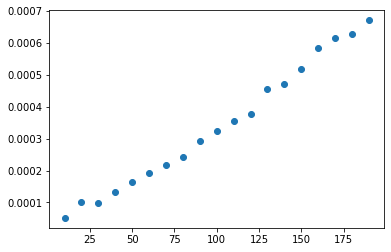

In [125]:
n = [x for x in range(10,200, 10)]
times = []
for points in n:
    total_time = 0
    for i in range(0, 20):
        start = time.time()
        jarvismarch(np.random.random(size=(points,2)).tolist())
        total_time += time.time() - start
    times.append(total_time / 20)

plt.scatter(n, times)
plt.show()

# Extended Graham-scan. Optimised with the Akl-Toussaint heuristic

In [126]:
global averageCase
averageCase = True


def polarAngle(p0, p1 = None):
    if p1 == None:
        p1 = llmPoint
    dy = p0[1] - p1[1]
    dx = p0[0] - p1[0]
    return math.atan2(dy, dx)


def distance(p0, p1 = None):
    if p1 == None:
        p1 = llmPoint
    dy = p0[1] - p1[1]
    dx = p0[0] - p1[0]
    return dy ** 2 + dx ** 2


def determinant(p1, p2, p3):
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])  
        


def insertionSort(list1, left, right): 
    for i in range(left + 1, right + 1): 
        j = i 
        while j > left and polarAngle(list1[j]) < polarAngle(list1[j - 1]): 
            list1[j], list1[j - 1] = list1[j - 1], list1[j] 
            j -= 1
            
def merge(list1, leftIndex, middleIndex, rightIndex): 
    n1 =  middleIndex - leftIndex + 1
    n2 = rightIndex - middleIndex
    left, right = [], [] 
    for i in range(0, n1): 
        left.append(list1[leftIndex + i]) 
    for i in range(0, n2): 
        right.append(list1[middleIndex + 1 + i]) 
    i = 0
    j = 0
    k = leftIndex
    while i < n1 and j < n2: 
        if polarAngle(left[i]) <= polarAngle(right[j]): 
            list1[k] = left[i] 
            i += 1
        else: 
            list1[k] = right[j] 
            j += 1
        k += 1
    while i < n1: 
        list1[k] = left[i] 
        k += 1
        i += 1
    while j < n2: 
        list1[k] = right[j] 
        k += 1
        j += 1

def timSort(list1): 
    MIN_RUN = 32
    for start in range(0, len(list1), MIN_RUN): 
        end = min(start + MIN_RUN - 1, len(list1) - 1) 
        insertionSort(list1, start, end) 
    size = MIN_RUN
    while size < len(list1) : 
        for left in range(0, len(list1), size * 2): 
            middle = min(len(list1) - 1, left + size - 1) 
            right = min((left + size * 2 - 1), (len(list1) - 1)) 
  
            merge(list1, left, middle, right)
        size *= 2  

def inQuad(l, t, r, b, p):
    if determinant(l, t, p) < 0  and determinant(t, r, p) < 0 and determinant(r, b, p) < 0 and determinant(b, l, p) < 0:
        return True
    return False

def akl_toussaint(inputSet):
    #collects the four boundary points on the hull from the map of points
    #most right point
    xmax = max(inputSet, key=lambda p: p[0])
    #most left point
    xmin = min(inputSet, key=lambda p: p[0])
    #top point
    ymax = max(inputSet, key=lambda p: p[1])
    #bottom point
    ymin = min(inputSet, key=lambda p: p[1])    
    
    newSet = []
    
    for point in inputSet:
        #only adds points outside of the convex quadrilateral
        if not inQuad(xmin, ymax, xmax, ymin, point):
            newSet.append(point)
    return newSet

#finds the bottom left point
def LowestLeftMost(inputSet):
    MIN = 0
    for i in range(0, len(inputSet)):
        #first finds the lowest point in the input set
        if inputSet[i][1] < inputSet[MIN][1]:
            MIN = i
        # when two points have the same y coordinate
        #we must compare x coordinates and the one with the lowest x coordinate is the minimum point
        if inputSet[i][1] == inputSet[MIN][1]:
            if inputSet[i][0] < inputSet[MIN][0]:
                MIN = i     
    return inputSet[MIN]

def extendedgrahamscan(inputSet):
    global llmPoint
    if averageCase == True:
        inputSet = akl_toussaint(inputSet)
    llmPoint = LowestLeftMost(inputSet)
    #sort the list of points based on polar angle
    timSort(inputSet)
    sortedPoints = inputSet
    #the hull must have the lowest leftmost point
    #sortedPoints[0] is used to make an initial comparison later on
    outputSet = [llmPoint, sortedPoints[0]]
    for s in sortedPoints[1:]:
        #when the orientation is clockwise or the points are co-linear it should pop the last item from the stack
        while determinant(outputSet[-2], outputSet[-1], s) <= 0 :
            outputSet.pop()
            if len(outputSet) < 2: #Check to make sure llm point is not deleted
                break
        outputSet.append(s)
    return outputSet


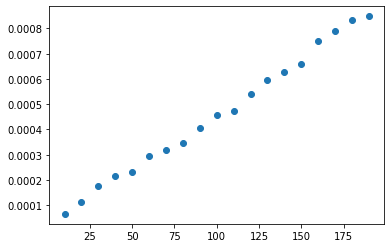

In [127]:
n = [x for x in range(10,200, 10)]
times = []
for points in n:
    total_time = 0
    for i in range(0, 20):
        start = time.time()
        extendedgrahamscan(np.random.random(size=(points,2)).tolist())
        total_time += time.time() - start
    times.append(total_time / 20)

plt.scatter(n, times)
plt.show()

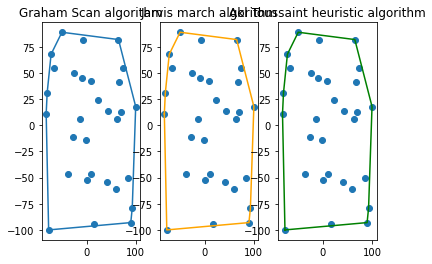

In [128]:
def generateRandomInputSet(N):
    inputSet = []
    for i in range(0, N):
        x = random.randint(-100, 100)
        y = random.randint(-100, 100)
        inputSet.append([x, y])
    return inputSet

n = 30
inputSet = generateRandomInputSet(n)
outputGraham = grahamscan(inputSet)
outputJarvis = jarvismarch(inputSet)
outputExtendedGraham = extendedgrahamscan(inputSet)


input_xs, input_ys = zip(*inputSet)

plt.subplot(1,3,1)
plt.scatter(input_xs,input_ys)
outputGraham.append(outputGraham[0])
output_xs, output_ys = zip(*outputGraham) 
plt.plot(output_xs,output_ys)
plt.title("Graham Scan algorithm")
plt.subplot(1,3,2)
plt.scatter(input_xs,input_ys)
outputJarvis.append(outputJarvis[0])
output_xs, output_ys = zip(*outputJarvis) 
plt.plot(output_xs,output_ys,color='orange')
plt.title("Jarvis march algorithm")

plt.subplot(1,3,3)
plt.scatter(input_xs,input_ys)
outputExtendedGraham.append(outputExtendedGraham[0])
output_xs, output_ys = zip(*outputExtendedGraham) 
plt.plot(output_xs,output_ys,color='green')
plt.title("Akl Toussaint heuristic algorithm")
plt.show()
